In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#Linear Regression - Predict Length1 of Fish using Height 
X = np.array(data['Height'])
y = data['Length1']
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)


In [5]:
#MAE & MSE linear model
mae = mean_absolute_error(predictions,y_test)
print(f'MAE Linear Regression = {mae} ')

mse = mean_squared_error(predictions,y_test)
print(f'MSE Linear Regression = {mse}')

MAE Linear Regression = 6.918132445986077 
MSE Linear Regression = 79.73767231519489


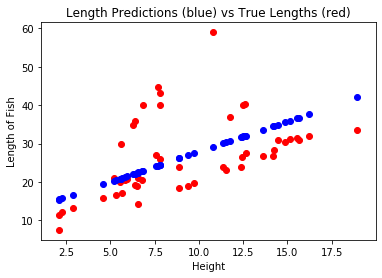

In [6]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, predictions, color = 'blue')
plt.title('Length Predictions (blue) vs True Lengths (red)')
plt.ylabel('Length of Fish')
plt.xlabel('Height')
plt.show()

In [7]:
#Non linear regression using support vector regression
#Predicting Weight using Length1
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = np.array(data['Length1'])
y = data['Weight']
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

nonlin_rg = SVR(kernel='rbf', C=100, epsilon=0.1,gamma = 0.1)

model = make_pipeline(StandardScaler(), nonlin_rg)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#print(predictions)
#print('\n')
#X_test
#print('\n')
#y_test

In [8]:
#MAE & MSE non-linear model


In [9]:
mae = mean_absolute_error(predictions,y_test)
print(f'MAE Non-linear Regression = {mae} ')
mse = mean_squared_error(predictions,y_test)
print(f'MSE Non-linear Regression = {mse}')

MAE Non-linear Regression = 111.9348739768451 
MSE Non-linear Regression = 30686.1849568766


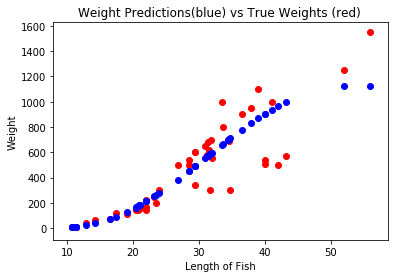

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test,predictions, color = 'blue')
plt.title('Weight Predictions(blue) vs True Weights (red) ')
plt.xlabel('Length of Fish')
plt.ylabel('Weight')
plt.show()